In [1]:
#Task-6
# Apply advanced statistical and analytical methods to solve complex problems.
# 1. Implement time series analysis for forecasting trends and seasonality.
# 2. Perform sentiment analysis or text mining on unstructured data.
# 3. Explore clustering or classification techniques for segmentation and pattern recognition.

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df = pd.read_csv('/content/disney_plus_titles.csv')
print(df.head(5))

  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3                         NaN   
4                         NaN   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales                    NaN   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...          United States   

 

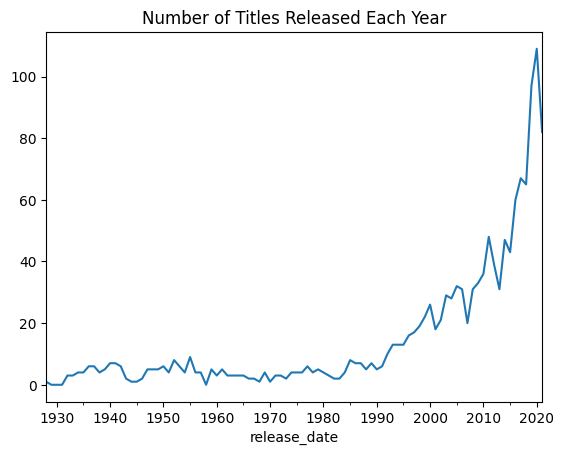

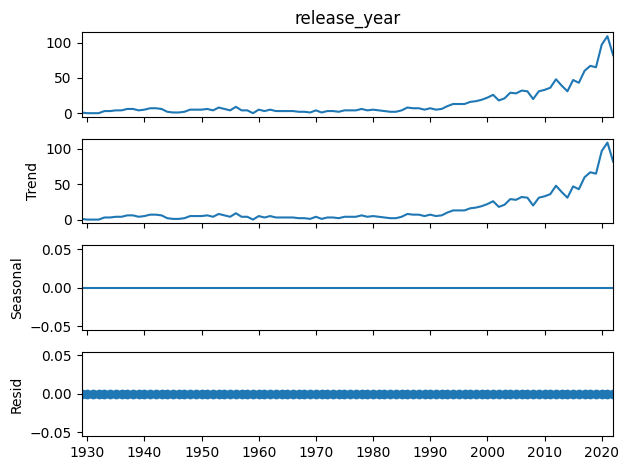

In [6]:
# 1. Time Series Analysis for Forecasting Trends and Seasonality
df['release_date'] = pd.to_datetime(df['release_year'], format='%Y')
df.set_index('release_date', inplace=True)

# Plotting the release_year data
df['release_year'].resample('A').count().plot()
plt.title('Number of Titles Released Each Year')
plt.show()

# Decompose the time series for trends and seasonality
result = seasonal_decompose(df['release_year'].resample('A').count(), model='additive')
result.plot()
plt.show()

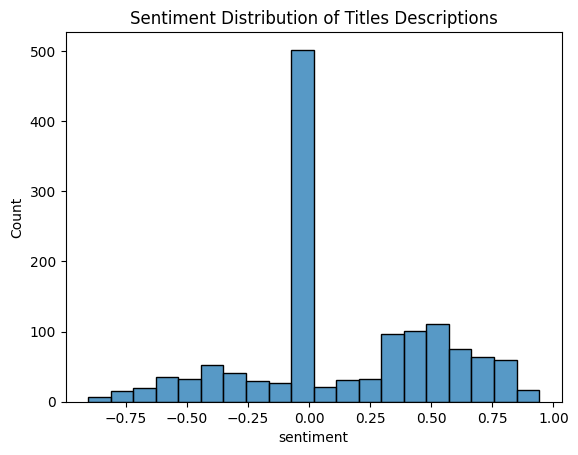

In [9]:
# 2. Sentiment Analysis or Text Mining on Unstructured Data

sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Plot the sentiment scores
sns.histplot(df['sentiment'], bins=20)
plt.title('Sentiment Distribution of Titles Descriptions')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


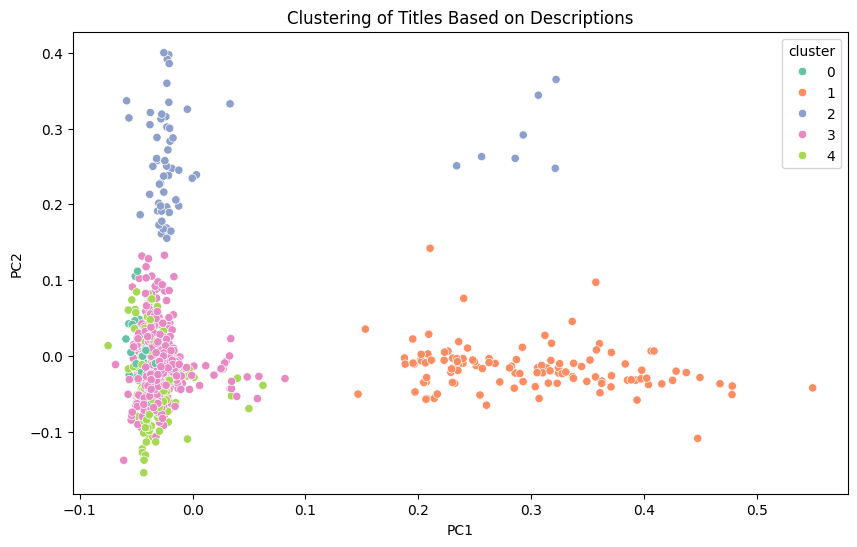

In [11]:
# 3. Clustering or Classification Techniques for Segmentation and Pattern Recognition
# Drop NaN values in 'description' column and reset index
df_clean = df.dropna(subset=['description']).reset_index(drop=True)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_clean['description'])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X.toarray())

# Create a dataframe with PCA components and cluster labels
pca_df = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df_clean['cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='Set2')
plt.title('Clustering of Titles Based on Descriptions')
plt.show()
